# 파이썬으로 풀어보는 수학

- 원서명 : Doing Math with Python: Use Programming to Explore Algebra, Statistics, Calculus, and More! (ISBN 9781593276409)
- 지은이 : 아미트 사하(Amit Saha)
- 원서 및 관련자료 : <https://www.nostarch.com/doingmathwithpython>
- 번역서 : <http://www.acornpub.co.kr/book/doing-math-with-python>

![책표지](./image/cover.jpg)

## 6장 기하학적 형상과 프랙탈 그리기

### 1. MatPlotLib의 패치(patches)로 기하학적 형상 그리기

앞장에서 `matplotlib`을 사용하여 그래프를 그리는 것은 많이 해봤습니다.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

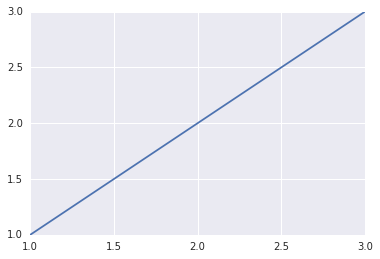

In [6]:
x = [1, 2, 3]
y = [1, 2, 3]

plt.plot(x, y)
plt.show()

우리가 명시적으로 생성하지는 않았지만 그래프를 위해 `Figure`객체와 `Axes`객체를 내부적으로 자동생성하여서 그 위에 그래프를 작성한 것입니다.
명시적으로 `Figure`와 `Axes`객체를 생성 할 수 있습니다.

In [3]:
fig = plt.figure()
fig

In [4]:
ax = plt.axes()
ax

명시적 생성뿐 아니라 현재 객체에 대한 참조를 가져오는 함수도 존재합니다.
만약 해당 객체가 존재하지 않는 상태에서는 생성을 합니다.

In [5]:
plt.gcf()

In [6]:
plt.gca()

이 얘기를 한 이유는 `matplotlib`에 도형(기하학적 형상)을 그리는데 필요하기 때문입니다.

#### 원 그리기

원을 생성하여 축(axes)에 추가하는 방법으로 그릴 수 있습니다.

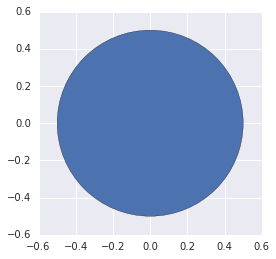

In [7]:
circle = plt.Circle((0, 0), radius = 0.5)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

패치의 색상을 변경하려면 `fc`(채우기)와 `ec`(테두리)에 색상을 전달하면 됩니다.
원(`Circle`) 이외에 타원(`Ellipse`), 다각형(`Polygon`), 직사각형(`Rectangle`) 등의 여러가지 다른 패치도 지원합니다.

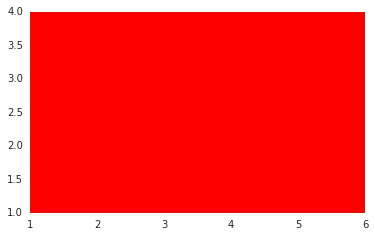

In [8]:
circle = plt.Rectangle((1,1), height = 3, width = 5, fc = 'r', ec = 'g')
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

### 2. 움직이는 그림 만들기

`matplotlib`의 `animation`기능을 이용하면 움직이는 그림을 만들 수 있습니다.
윈도우를 닫을때까지 반지름이 무한대로 커지는 원을 그려보겠습니다.

In [11]:
from matplotlib import animation
from matplotlib import pyplot as plt

circle = plt.Circle((0,0), 0.05)

def update_radius(i, circle):
    circle.radius = i * 0.5
    return circle

fig = plt.gcf()

ax = plt.axes(xlim=(-10,10), ylim=(-10,10))
ax.set_aspect('equal')
ax.add_patch(circle)

ani = animation.FuncAnimation(fig, update_radius, fargs = (circle,), frames = 30, interval=50)

plt.title('Simple Circle Animation')
plt.show()

![원 애니메이션](./image/DoingMathWithPython.Ch06.04.png)

중심에서부터 원이 점점 커지는 애니메이션이 30 프레임만큼 진행된 후 후 다시 처음부터 시작하는 것을 확인할 수 있습니다.  
`animation.FuncAnimation`에 전달되는 인자들의 목록을 살펴보겠습니다.

- `fig` : 현 그림의 객체
- `update_radius` : 프레임 번호와 프레임마다 갱신하기를 바라는 패치 객체가 전달되어서 원하는 모양으로 변경한 뒤 패치 객체를 리턴
- `fargs` : `update_radius()`에게 전달되는 인자들의 목록 (프레임 번호는 제외)
- `frames` : 애니메이션의 프레임 개수. 여기에 적힌 수 만큼 `update_radius()`를 호출하게 됨
- `interval` : 프레임 간의 시간 간격 (밀리미터 단위)
- `repeat` : `True`, `False` 값을 가질 수 있으며 애니메이션의 반복 유무를 결정. (default는 `True`)

`animation.FuncAnimation` 객체를 사용하지 않으면서 변수로 저장한 이유는 가비지 컬렉터에 의해서 해제되지 않게하기 위함입니다.

#### 투사체의 포물선 애니메이션

2장에서 던진 공에 대한 포물선 운동 궤적을 그래프로 표시해보았습니다.
이번에는 이를 애니메이션으로 구현해 보겠습니다.

먼저 2장에서 배운 내용에 대해서 간략하게 복습해 보겠습니다.

- 초기속도 : u
- 초기던진 각도 : theta
- x방향 속도 : u * cos(theta)
- y방향 속도 : u * sin(theta) - gt

비행시간은 y방향으로 최고점에 도달하는 시간의 2배입니다.
최고점에 도달하는 시간은 y방향의 속도가 0이 되는 시점입니다.
이를 `sympy`를 이용해서 풀어보겠습니다.

In [3]:
from sympy import Symbol, symbols, sin, cos, solve, init_printing

init_printing(order='lex')

u, theta, g, time = symbols('u,theta,g,t')

x_speed = u * cos(theta)
y_speed = u * sin(theta) - g * time
y_speed

In [5]:
s = solve(y_speed, time)
flight_time = s[0] * 2

flight_time

- 비행시간 : 2 * u * sin(theta) / g

In [6]:
x_distance = x_speed * time

x_distance

In [7]:
from sympy import expand

y_distance = expand(y_speed * time + g * time ** 2 / 2)

y_distance

`y`방향 이동거리는 적분을 통해서 계산을 해야하므로 유도과정은 생략하겠습니다.

그럼 위 수식을 이용해서 `u`와 `theta`값이 주어졌을 경우 최대 비행시간을 구하고 그것으로 `x`축 `y`축의 최대이동 거리를 구하는 함수를 만들어 보겠습니다.

In [8]:
import math
def get_flight_time(speed, radian, gravity = 9.8):
    radian = math.radians(radian)
    return flight_time.subs({u: speed, theta: radian, g: gravity})

get_flight_time(5, 45)

In [9]:
def get_flight_distance(speed, radian, gravity = 9.8):
    t = get_flight_time(speed, radian, gravity)
    radian = math.radians(radian)
    x_distance_evaludate = x_distance.subs({u: speed, theta: radian, time: t})
    y_distance_evaludate = y_distance.subs({u: speed, theta: radian, time: t / 2, g: gravity})
    return x_distance_evaludate, y_distance_evaludate

get_flight_distance(5, 45)

`y`축은 전체시간으로 이동거리를 계산하면 0에 가까운 수가 나옵니다.
그러니 최고 높이인 `t/2`만큼의 시간동안의 이동거리로 계산해서 화면에 표시할 최대 크기를 구해냅니다.
이제 포물선 그래프를 그리는데 필요한 모든 계산은 끝났습니다.
위 계산식을 이용해서 실제 비행동안의 `x`,`y`좌표들을 계산해주는 함수를 작성해 보겠습니다.

In [12]:
def get_projectile_points(speed, radian, gravity = 9.8, step = 0.001):
    t = get_flight_time(speed, radian, gravity)
    
    radian = math.radians(radian)
    current_time = 0
    x_list = []
    y_list = []
    while current_time <= t:
        x_list.append(x_distance.subs({u: speed, theta: radian, time: current_time}))
        y_list.append(y_distance.subs({u: speed, theta: radian, time: current_time, g: gravity}))
        current_time += step
    return x_list, y_list

그냥 위 함수의 결과에 대해서 그림만 그려주면 됩니다.

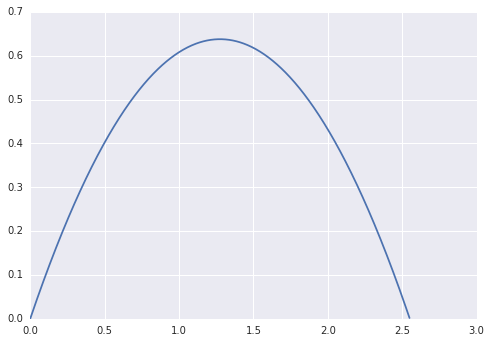

In [15]:
from matplotlib import pyplot as plt

def draw_plot(xList, yList):
    plt.plot(xList, yList)
    plt.show()

def draw_projectile(speed, radian, gravity = 9.8, step = 0.001):
    x_list, y_list = get_projectile_points(speed, radian)
    draw_plot(x_list, y_list)

draw_projectile(5, 45)

`plot`상에 그려보니 계산 과정은 제대로 되었다는 것을 확인할 수 있습니다.
그럼 이제 원래 목적인 애니메이션으로 표현해 보겠습니다.

만약 `inline`으로 출력될 경우에는 `kernel`을 다시 실행해서 팝업으로 뜨게 해야지 정상적으로 애니메이션으로 실행되는 것을 확인 할 수 있습니다.

In [ ]:
from matplotlib import animation
from matplotlib import pyplot as plt
import seaborn

def update_position(i, circle, xList, yList):
    circle.center = xList[i], yList[i]
    return circle

def animate_projectile(speed, radian, gravity = 9.8, step = 0.005):
    t = get_flight_time(speed, radian, gravity)
    x_dist, y_dist = get_flight_distance(speed, radian, gravity)

    circle = plt.Circle((0,0), 0.1)

    fig = plt.gcf()
    ax = plt.axes(xlim=(0, float(x_dist)), ylim=(0, float(y_dist)))
    ax.set_aspect('equal')
    ax.add_patch(circle)
    
    x_list, y_list = get_projectile_points(speed, radian, gravity, step)

    maxFrame = int(t / step)
    ani = animation.FuncAnimation(fig, update_position, fargs = (circle, x_list, y_list), frames = maxFrame, interval=1)
    
    plt.title('Projectile')
    plt.show()

animate_projectile(5, 45)

![투사체 애니메이션](./image/DoingMathWithPython.Ch06.06.png)

### 3. 프랙탈 그리기

>`프랙탈` 이란 단순한 구조가 끊임없이 반복되면서 복잡하고 묘한 전체 구조를 만드는 것으로, 즉`자기유사성(self-similarity)`와 `순환성(recursiveness)`라는 특징을 가지고 있다.  
> 우리 생활 속 프랙탈 by 희훈 박 (<https://prezi.com/gffdwoyxj7qd/presentation/>)

여기서는 대표적인 **프랙탈** 중 3개 `반즐리의 고사리(Barnsley fern)`, `시어핀스키의 삼각형(Sierpinski triangle)`, `만델브로트 집합(Mandelbrot set)`을 그려보겠습니다.

#### 평면상의 점 변환 (단순한 프랙탈 예제)

프랙탈의 개념을 이해하기 위해서 가장 단순한 형식으로 프랙탈을 설명해 드리고자 합니다.
평면상의 어떤 점 `P(x,y)`가 있을 경우 이것을 다른 임의의 점 `Q(x+1, y+1)`로 변환을 시킬 경우,
이 과정을 계속해서 반복하면 우측상단 방향으로 점이 1개씩 생성될 것입니다.

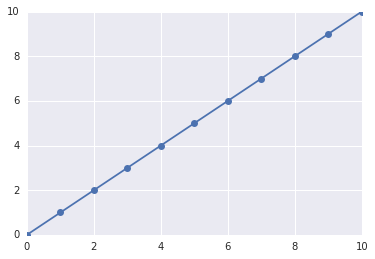

In [22]:
from matplotlib import pyplot as plt
from matplotlib import animation

def simple_point(x, y):
    return x+1, y+1

def draw_fractal(func, max_step, draw_style = 1, startX = 0, startY = 0):
    # draw_style: [1] plot with marker, [2] plot without marker, [3] scatter
    x, y = startX, startY
    x_list = [x]
    y_list = [y]

    for i in range(max_step):
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)

    if (draw_style == 1):
        plt.plot(x_list, y_list, marker='o')
    elif (draw_style == 2):
        plt.plot(x_list, y_list)
    else:
        plt.scatter(x_list, y_list)
        
    plt.show()

draw_fractal(simple_point, 10)

여기서 조금의 변화를 줘보겠습니다.
이동하는 룰을 하나가 아닌 두 개의 룰을 줄고 랜덤으로 추출하게 하겠습니다.

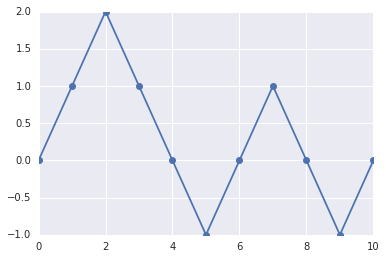

In [25]:
import random

def simple_two_point(x, y):
    rand = random.randint(0,1)
    return x+1, y+1 if rand == 1 else y-1

draw_fractal(simple_two_point, 10)

교제에서는 `random.choice()`를 사용하여 구현을 하였습니다.
이 함수는 입력된 리스트 중 동일한 확률로 랜덤으로 선택된 결과를 리턴합니다.
`random.choice()`를 사용한 방법으로 구현해 보겠습니다.

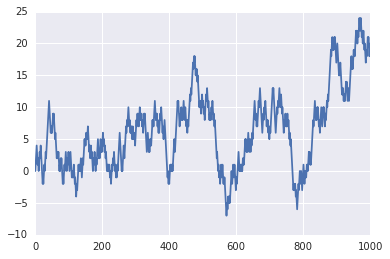

In [26]:
def Trans0(x, y): return x+1, y+1
def Trans1(x, y): return x+1, y-1

transList = [Trans0, Trans1]

def simple_two_point(x,y): return random.choice(transList)(x,y)

draw_fractal(simple_two_point, 1000, 2)    

일반적으로 이러한 지그재그 경로를 라인상에서 움직이는 모양을 랜덤워크라고 합니다.
이런 것이 프랙탈을 생성하기 위한 기초 아이디어입니다.

#### 반즐리의 고사리

영국수학자 마이클 반즐리(Michael Barnsley)는 점으로 간단한 변환을 반복 적용해 고사리와 같은 구조를 만드는 방법을 설명했습니다.

>**변환 1**(0.85%)  
x = 0.85x + 0.4y  
y = -0.04x + 0.85y + 1.6  
>
>**변환 2**(0.07%)  
x = 0.2x - 0.26y  
y = 0.23x + 0.22y + 1.6  
>
>**변환 3**(0.07%)  
x = -0.15x + 0.28x  
y = 0.26x + 0.24y + 0.44  
>
>**변환 4**(0.01%)  
x = 0  
y = 0.16y  

먼저 앞장(ch.05)에서 생성한 비균일 확률에서의 index를 구하는 함수를 재사용하도록 가져오겠습니다.

In [27]:
import random

def get_index(probabilities):
    max = sum(probabilities)
    
    acc = 0
    rand = random.random() * max
    for idx, percent in enumerate(probabilities):
        acc += percent
        if rand < acc:
            return idx
    return len(probabilities)

이제 위 반즐리의 수식을 이용해서 그려보겠습니다.

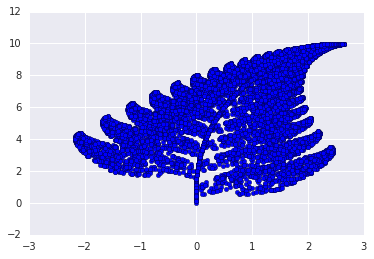

In [28]:
def barnsley1(x, y): return 0.85*x + 0.04*y  , -0.04*x + 0.85*y + 1.6
def barnsley2(x, y): return 0.2*x - 0.26*y   , 0.23*x + 0.22*y + 1.6
def barnsley3(x, y): return -0.15*x + 0.28*y , 0.26*x + 0.24*y + 0.44
def barnsley4(x, y): return 0                , 0.16*y

barnsley_list = [barnsley1, barnsley2, barnsley3, barnsley4]
barnsley_percent = [0.85, 0.07, 0.07, 0.01]

def barnsley_fractal(x,y):
    return barnsley_list[get_index(barnsley_percent)](x,y)

draw_fractal(barnsley_fractal, 10000, 3)   

## 프로그래밍 연습

### 1. 사각형 내에 원을 포함시키기
```
먼저 큰 사각형을 하나 그린 다음,
그 사각형 내에 반지름 0.5인 원을 사각형 내에 채워넣으세요.
(단 사격형의 변의 길이가 1 단위로 소숫점이 없는 길이로 해야만 정확하게 원을 채울 수가 있습니다.)
```

먼저 `사각형`을 그리는 함수를 생성하겠습니다.
나중에 `원`도 그려야 하니 `plot`에 `패치`를 전달하여 그리는 함수와 `사각형 패치`를 전달하는 함수로 분리하겠습니다.
`Rectangle`로 그리는 방법은 앞에서 살펴봤으니 이번에는 `Polygon`을 이용해서 그려보겠습니다.

In [29]:
from matplotlib import pyplot as plt

def get_square(x, y, width, height):
    return plt.Polygon([(x,y), (x+width,y), (x+width,y+height), (x,y+height)], closed = True, fc='r')

def draw_patches(patches, width, height):
    ax = plt.axes(xlim=(0,width),ylim=(0,height))
    ax.set_aspect('equal')
    for patch in patches:
        ax.add_patch(patch)
    plt.show()

위에 만든 함수들이 제대로 동작하는지 테스트해 보겠습니다.

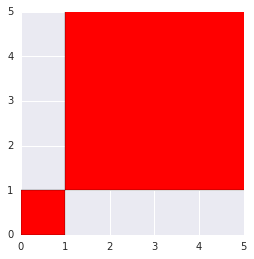

In [30]:
s1 = get_square(1,1,5,5)
s2 = get_square(0,0,1,1)

draw_patches([s1, s2], 5,5)

잘 그려지는군요. 그럼 원을 그리는 함수를 추가해 보겠습니다.

In [31]:
def get_circle(x, y, r):
    return plt.Circle((x,y), radius = r, fc='b')

원을 그리는 함수도 테스트 해보겠습니다.

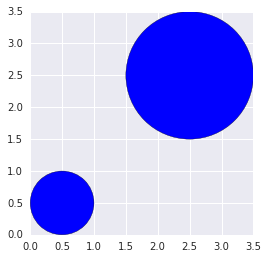

In [32]:
c1 = get_circle(0.5,0.5,0.5)
c2 = get_circle(2.5,2.5,1)

draw_patches([c1, c2], 3.5, 3.5)

잘 그려지는군요.
그럼 이제 크기를 입력 받아서 해당 영역에 원으로 채우는 로직만 구현해주면 문제가 끝나겠군요.

In [35]:
def make_circles_in_area(x, y, width, height, r = 0.5):
    cx, cy =  x + r, y + r
    ex, ey =  x + width, y + height
    circles = []
    
    while cx + r <=  ex:
        while cy + r <= ey:
            circles.append(get_circle(cx,cy,r))
            cy += r*2
        cx += r*2
        cy = y + r
        
    return circles

위 함수가 제대로 동작하는지 테스트 해보겠습니다.

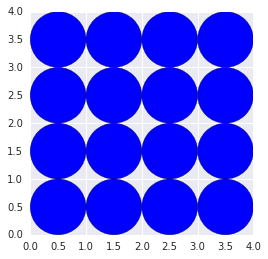

In [36]:
draw_patches(make_circles_in_area(0,0,4,4),4,4)

이제 위에서 생성한 함수들을 하나로 합쳐서 문제를 해결하는 함수를 만들어 보겠습니다.

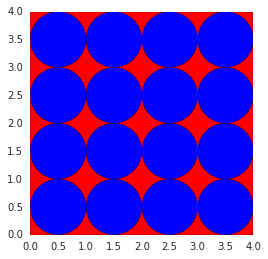

In [37]:
def draw_square_and_circles(x, y, width, height, r = 0.5):
    square = get_square(x, y, width, height)
    circles = make_circles_in_area(x, y, width, height)

    patches = [square]
    patches.extend(circles)
    
    draw_patches(patches, x+width, y+height)

draw_square_and_circles(0,0,4,4)

### 2. 시어핀스키의 삼각형 그리기

폴란드 수학자 바츌라프 시어핀스키(Waclaw Sierpinski)의 정삼각형을 그리는 프랙탈 규칙은 다음과 같습니다.

>**변환 1**  
x = 0.5x  
y = 0.5y  
>**변환 2**  
x = 0.5x + 0.5  
y = 0.5y + 0.5  
>**변환 3**  
x = 0.5x + 1
y = 0.5y

모든 확률은 1/3으로 동일합니다.
```
시어펀스키의 삼각형을 그리는 프로그램을 작성하세요.
```

반즐리의 고사리 그리기에 생성한 함수들을 재사용하여 위 수식과 확률만 새로 입력해주면 됩니다.

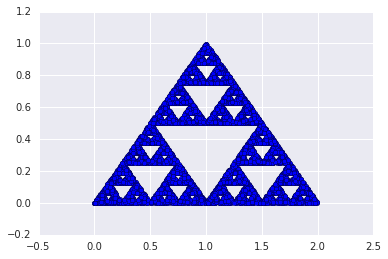

In [38]:
def sierpinski1(x, y): return 0.5*x, 0.5*y
def sierpinski2(x, y): return 0.5*x + 0.5, 0.5*y + 0.5
def sierpinski3(x, y): return 0.5*x + 1, 0.5*y

sierpinski_list = [sierpinski1, sierpinski2, sierpinski3]
sierpinski_percent = [1,1,1]

def sierpinski_fractal(x,y):
    return sierpinski_list[get_index(sierpinski_percent)](x,y)

draw_fractal(sierpinski_fractal, 10000, 3)  

### 3. 헤논 함수 탐색

1976년 마이클 헤논(Michael Henon)은 헤논 함수를 소개하였습니다.

> P(x,y) -> Q(y + 1 - 1.4x^2, 0,3x)

```
(1,1)에서 시작해 2만번 수행하는 그래프를 만들어 보세요.  
애니메이션으로 작성하는 경우 추가 점수가 있습니다.
```

먼저 그래프로 작성해보겠습니다.  

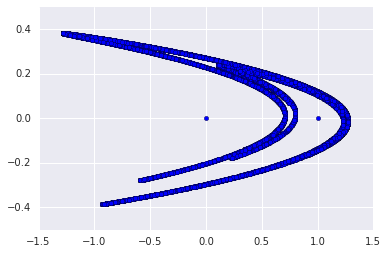

In [39]:
def henon_function(x, y): return y + 1 - (1.4 * x**2), 0.3*x

henon_list = [henon_function]
henon_percent = [1]

def henon_fractal(x,y):
    return henon_list[get_index(henon_percent)](x,y)

draw_fractal(henon_fractal, 20000, 3, 0, 0)  

책 문제대로 시작점을 `1,1`에서 하면 이상한 곳에 점이 찍힙니다.
그냥 `0,0`부터 하면 올바르게 됩니다.

이제 추가 점수를 받기 위해 애니메인션으로 작성해 보겠습니다.

In [21]:
from matplotlib import animation

def get_henon_result(step, startX = 0, startY = 0):
    x, y = startX, startY
    x_list = []
    y_list = []
    
    for i in range(0,step):
        x_list.append(x)
        y_list.append(y)
        x, y = henon_function(x, y)
        
    return x_list, y_list

def update_henon_position(i,ax, xList, yList):
    circle = plt.Circle((xList[i], yList[i]), 0.01)
    ax.add_patch(circle)
    return ax

def animate_henon(max_frame):
    
    xList, yList = get_henon_result(max_frame, 0, 0)

    circle = plt.Circle((0,0), 0.01)

    fig = plt.gcf()
    ax = plt.axes(xlim=(-1.5, 1.5), ylim=(-0.5, 0.5))
    ax.set_aspect('equal')
    
    ani = animation.FuncAnimation(fig, update_henon_position, fargs = (ax, xList, yList), frames = max_frame, interval=1)
    
    plt.title('Henon Function')
    plt.show()

animate_henon(20000)

![헤논 함수](./image/DoingMathWithPython.Ch06.19.png)

기존에는 `circle`의 위치를 업데이트하여 해당 객체를 리턴했는데, 이번에는 그렇게 하면 점들이 계속 움직이기 때문에,
`ax`를 전달하여 거기에 `circle`을 추가하고 `ax`를 리턴받는 식으로 구현하였습니다.


### 4. 만델브로트(Mandelbrot) 집합 그리기

본 문제를 풀기전에 화면에 이미지를 출력하는 예제가 있습니다.
```
x,y 가 모두 0에서 5까지인 카르테지안 평면에서 각 축을 따라 5개의 동일한 지점을 고려하여 25개의 영역에 흰색부터 검은색까지의 색분포를 갖는 점들을 색칠하는 프로그램을 작성하도록 합시다. 각각의 점의 색은 검정색을 0, 흰색을 10으로 설정하여 그 사이값을 가집니다.
```
먼저 2차원 List를 생성하는 함수를 작성해 보겠습니다.

In [40]:
def get_2D_list(xSize, ySize):
    list_2D = []
    for x in range(ySize):
        list_2D.append([])
        for y in range(xSize):
            list_2D[x].append(0)
    return list_2D           

이제 2차원 공간에  색상을 칠한후 이미지로 출력(`imshow`)을 해보겠습니다.

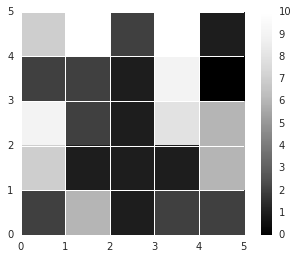

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

def make_random_colors(xSize, ySize, colorSize):
    list_2D = get_2D_list(xSize, ySize)
    
    for x in range(xSize):
        for y in range(ySize):
            list_2D[x][y] = random.randint(0, colorSize)
            
    return list_2D

def draw_image(list2D):
    plt.imshow(list2D, origin='lower', extent=(0,5,0,5), cmap=cm.Greys_r, interpolation='nearest')
    plt.colorbar()
    plt.show()

draw_image(make_random_colors(5, 5, 10))

`imshow`의 주요 인자에 대한 설명입니다.
- `origin` : `lower`인 경우 입력된 `list2D[0][0]` 값이 이미지 상 (0,0)으로 매칭
- `extent` : 이미지 좌측하단을 (0,0), 우측상단을 (5, 5)로 설정
- `cmap=cm.Greys_r` : 회색스케일의 이미지를 생성
- `interpolation='nearest` : 가장 인접한 점과는 같은 색상으로 그리지 않도록 설정

위 예제를 20 x 20 사이즈의 20 color로 표시해 보겠습니다.

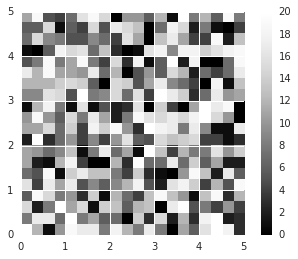

In [42]:
draw_image(make_random_colors(20, 20, 20))

이제 본 문제로 들어가겠습니다.

### 만델브로트 집합 그리기
```
(-2.5, -1.0) ~ (1.0, 1.0) 사이의 x-y평면 영역에 각 축을 400개의 동일한 공간의 점으로 나눕니다.
다음에 순서대로 2D List를 채웁니다.


1. 2개의 복소수를 생성 (j는 -1**0.5)
  z1 = 0 +  0j
  c = xi + ykj

2. 레이블 iteration을 생성하고 0으로 설정 (iteration = 0)

3. 복소수 z1 = z1^2 + c 생성

4. itertation 값을 1증가

5. abs(z1) < 2 이며 iteration < max_iteration 이면 3단계로 이동, 그렇지 않으면 6단계로 이동 (여기서는 max_teration을 1,000으로 설정 : 값이 클수록 더 복잡한 이미지가 생성되나 계산 시간이 더 길어짐)

6. 점(xi, yk)의 색상은 iteration 값으로 설정
```

문제만 봐서는 무슨 그림이 나올지 감이 안옵니다.
한 단계씩 구현해 보도록 하겠습니다.

In [43]:
def make_mandelbrot_set(size, max_iteration):
    list_2D = get_2D_list(size, size)

    x0, xn = -2.5, 1
    y0, yn = -1, 1
    dx = (xn - x0) / (size - 1)
    dy = (yn - y0) / (size - 1)

    for x in range(size):
        for y in range(size):
            iteration = 0
            z = complex(0,0)
            c = complex(x0 + x * dx, y0 + y * dy)
            while abs(z) < 2 and iteration < max_iteration:
                z = z**2 + c
                iteration += 1
            list_2D[y][x] = iteration
        
    return list_2D

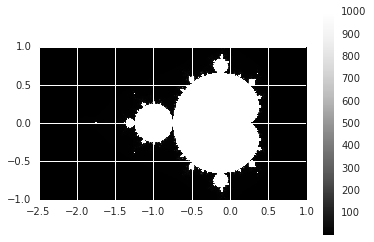

In [44]:
plt.imshow(make_mandelbrot_set(400,1000), origin='lower', extent=(-2.5, 1, -1,1), cmap=cm.Greys_r, interpolation='nearest')
plt.colorbar()
plt.show()

아래 위키에 가시면 자세한 설명과 재밌는 그림을 볼 수 있습니다.

<https://ko.wikipedia.org/wiki/%EB%A7%9D%EB%8D%B8%EB%B8%8C%EB%A1%9C_%EC%A7%91%ED%95%A9>

점 갯수를 증가하면 더 이미지가 선명해지고, `max_iteration`을 증가하면 더 복잡한 그림이 됩니다.


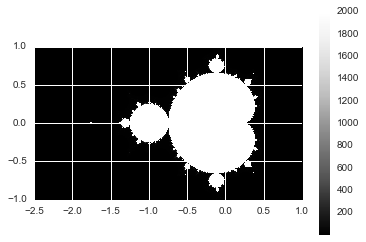

In [40]:
plt.imshow(make_mandelbrot_set(600,2000), origin='lower', extent=(-2.5, 1, -1,1), cmap=cm.Greys_r, interpolation='nearest')
plt.colorbar()
plt.show()

시간만 오래 걸리지 별차이 없어 보이네요.